# Imports

In [1]:
import pickle
from math import radians, cos, sin, atan2, sqrt, ceil

import visualize_plots as vp 
# import distance calculation function from module
import haversine_formula as hf
# Import visualization function from module

# Data

In [2]:
#Open pickle file with dataframe of cleaned divvy trips data
with open("data/divvy_trips.pkl", 'rb') as picklefile:
    df = pickle.load(picklefile)

# Calculate the Distance

In [4]:
def add_dist_from_loop(df):
    '''
    df [dataframe] = Divvy dataframe with the latitude and longitude columns of bicycle return or destination
    Function to calcuate the distance of the destination's latitude and longitude from the Loop, Chicago's downtown.
    df [dataframe] = Divvy dataframe with a column measuring trip destination distance from the Loop
    '''
    # we want to know how far the destinations of these trips are from Chicago's downtown
    loop_lat = 41.88
    loop_lng = -87.63
    
    df['end_dist_from_loop'] = df.apply(lambda row: hf.lat_lng_distance(loop_lat, loop_lng, 
                                                             row['end_lat'], row['end_lng']), axis = 1)     
    return df

In [5]:
def add_dist_from_lakefront(df):
    '''
    df [dataframe] = Divvy dataframe with the latitude and longitude columns of bicycle return or destination
    Function to calcuate the distance of the destinations longitude from the Lakefront's longitude.
    df [dataframe] = Divvy dataframe with a column measuring trip destination distance from the lakefront
    '''
    # The Chicago lakefront, a long park with trails, stretches along the majority of east border of Chicago.
    # Recreational cycling along the lakefront is a huge attraction in Chicago.
    # I wanted to see how far the trip destinations were from the lakefront. 
    # So I found the average longitude of the lakefront regardless of the latitude of the trip. 
    # How far north or south won't matter. But we'll be looking at how far west trip's ended. 
    lakefront_lng = -87.61
    df['end_dist_from_lakefront'] = df.apply(lambda row: hf.lat_lng_distance(row['end_lat'], row['end_lng'], 
                                                             row['end_lat'], lakefront_lng), axis = 1)     
    return df

## Process data

In [6]:
def process_distance(df):
    '''
    df [dataframe] = Divvy dataframe with the latitude and longitude columns of bicycle return or destination
    Function to apply all the other distance functions.
    df [dataframe] = Divvy dataframe with columns measuring destination distance from the Loop and the Lakefront
    '''
    print('Before: ', df.shape)
    df = add_dist_from_loop(df)
    df = add_dist_from_lakefront(df)    
    print('After: ', df.shape)
    return df

In [7]:
df = process_distance(df)

Before:  (1015635, 16)
After:  (1015635, 18)


# Visualization

## End Station's Distance from the Loop by Week

/home/jyychang/pandemic_divvy/visualize_plots.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', ' 2019-12-29', ' 2020-01-27', \


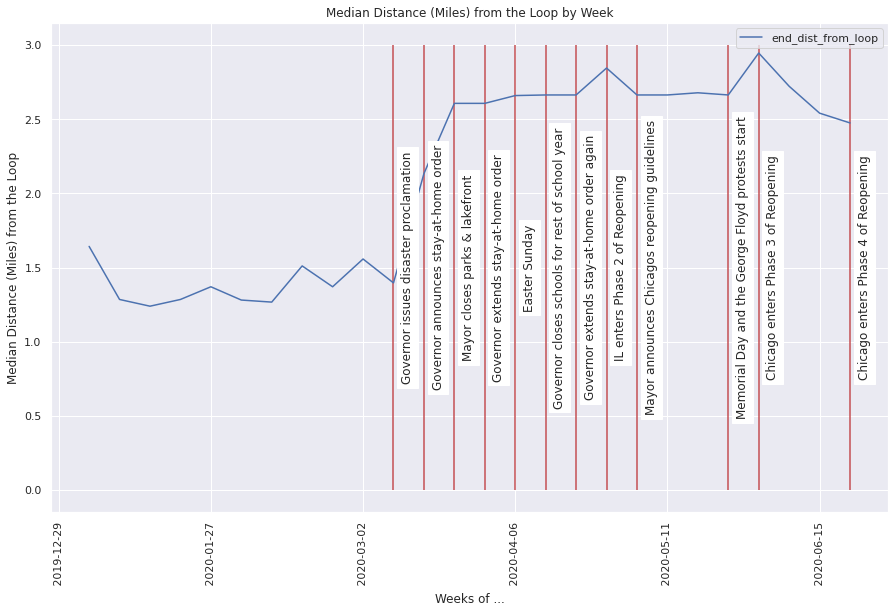

In [8]:
end_dist_from_loop_by_week = vp.plot_pivot(df, 'end_dist_from_loop', 'median', 'Median Distance (Miles) from the Loop')
# in order to avoid drastic outliers of trips that took place far north or far south, we are looking at median instead of mean
# applying the visualization function to look at the median destination distance form the loop across the weeks of 2020

## End Station's Distance from the Lakefront by Week

/home/jyychang/pandemic_divvy/visualize_plots.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', ' 2019-12-29', ' 2020-01-27', \


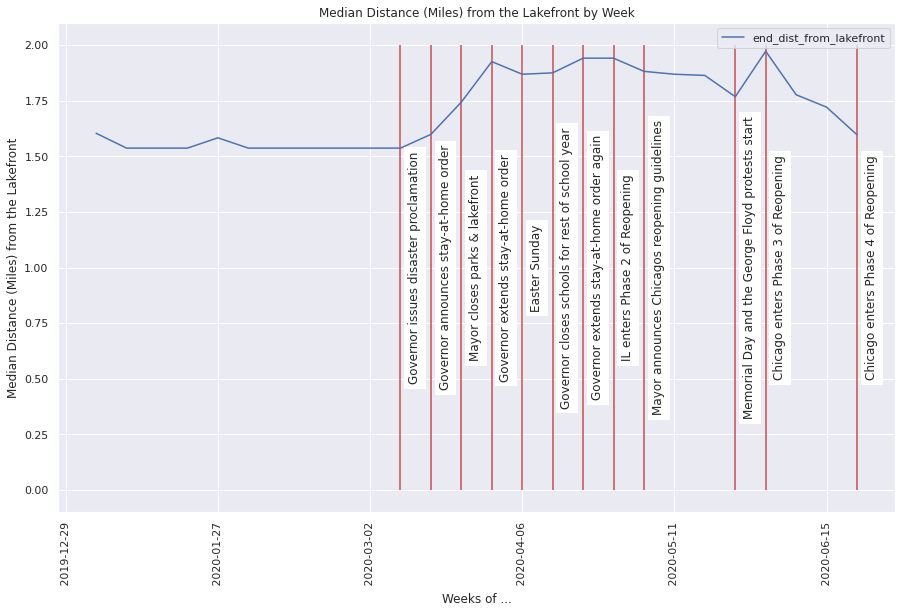

In [9]:
end_dist_from_lakefront_by_week = vp.plot_pivot(df, 'end_dist_from_lakefront', 'median', 'Median Distance (Miles) from the Lakefront')
# in order to avoid drastic outliers of trips taking place too far west, we are looking at median instead of mean
# applying the visualization function to look at the median destination's longitude distance from the lakefront across the weeks of 2020